# NLP Codealong

<a id='eda'></a>

## EDA

As always, we want to look at the basic shape of the data.  

What form do we want the above dataframe to take? What does a row represent? What does a column represent?

Let's take a look at one record.  What type of preprocessing steps should we take to isolate tokens of high semantic value?

Answer here

## Frequency Distributions

Let's look at the frequency distribution of all the words in the corpus.  To do so, we will use the FreqDist class from nltk.  

The FreqDist methods expect to receive a list of tokens, so we need to do a little preprocessing. We will use the RegexpTokenizer from nltk.  

There are a few places in this notebook where regular expressions will prove useful. 

Let's look at this tool [regexr](https://regexr.com/) and try to figure out the very basic pattern to match any word.


In [190]:
# Pass that pattern into our RegexpTokenizer

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer 

rt = RegexpTokenizer(pattern = '\w+' )

In [ ]:
# Join all of the words 
all_docs = ' '.join(list(X_train[0]))
# use the rt object's tokenize method to create a list of all of the tokens
all_words = rt.tokenize(all_docs)

In [242]:
# Instantiate a FreqDist object and pass allwords into it
fd = FreqDist(all_words)

# use the most_common method to see the 10 most common words
fd.most_common(10)

[('the', 97520),
 ('to', 53636),
 ('of', 50724),
 ('a', 42974),
 ('AX', 41899),
 ('and', 41313),
 ('I', 39088),
 ('is', 31244),
 ('in', 29504),
 ('that', 27895)]

## Visualize the distribution of the target with a bar chart

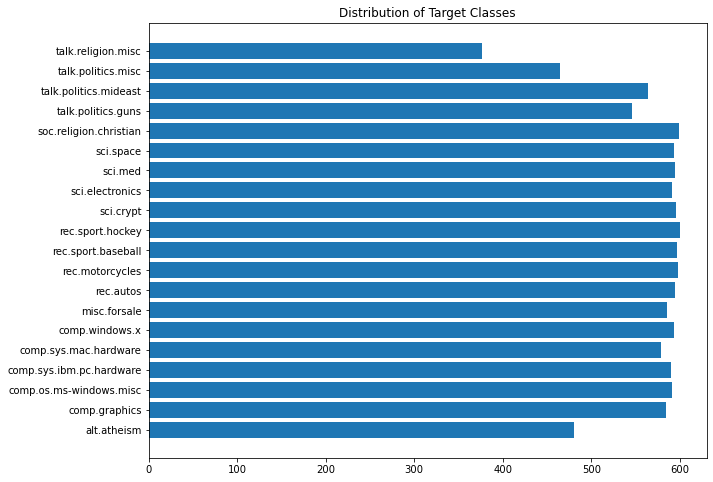

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
counts = np.unique(y, return_counts=True)[0]
labels = np.unique(y, return_counts=True)[1]
ax.barh(counts, labels)
ax.set_yticks(range(0,len(data.target_names)))
ax.set_yticklabels(data.target_names)
ax.set_title('Distribution of Target Classes')
ax.set_ylabel;

## Quick Model

Our model validation principles are consistent with NLP modeling.   
We split our data in the same way, ideally with a hold out set.   


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Count Vectorizor

A count vectorizor takes as input all of the documents in their raw form.  That being the case, if we are doing any preprocessing, such as custom transformations like lemming and stemming, we will need to recombine the tokens into the original documents.  

For our FSM, we will pass our documents into the vectorizer in their raw form.

In [198]:
from nltk.corpus import stopwords

cv = CountVectorizer(stop_words=stopwords.words('english'), token_pattern='[a-zA-Z]+' )

### Question: 

Look at all those wonderful parameters.  What parameters would be useful to test out? 

Let's look at our regular expressions again, and add a better pattern.

[regexr](https://regexr.com/)

With our CountVectorizer, we apply the same principles of model validation as we have with other data.  Fit on the training set, and transform both the train and test with that fit object. This will create a vocabulary associated with high predictive value built off of the training vocabulary. 

### DataFrame from sparse and get feature names

As we see above, the fit_transform method returns a sparse matrix.  Luckily, our alogrithms will handle sparse matrices, as we will see below.  But, if we want, we can convert our sparse matrix to a fully expressed dataframe using the .from_spmatrix method taken from DataFrame.sparse

In [249]:
X_train_vec = pd.DataFrame.sparse.from_spmatrix(cv.fit_transform(X_train[0]))

AttributeError: 'NoneType' object has no attribute 'fit_transform'

We can also add the words as column names using cv.get_feature_names()

In [248]:
# Add words as column names
X_train_vec.columns = cv.get_feature_names()
X_train_vec.head()

AttributeError: 'NoneType' object has no attribute 'get_feature_names'

As mentioned above, we don't necessarily need the feature names present to build our model.

Let's build a model with the count vectorizer from above, and use sklearns pipeline and cross_validate to see how accurately we can classify the documents.

We will apply a CountVectorizor and then a multinomial naive bayes classifier.

In [257]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

# create a pipeline object 
fsm_pipe = make_pipeline(CountVectorizer(stop_words=stopwords.words('english'), token_pattern='[a-zA-Z]+' ), MultinomialNB() )
cross_validate(fsm_pipe, X_train[0], y_train, return_train_score=True, scoring='f1_micro')

{'fit_time': array([1.31140304, 1.34622407, 1.32734108, 1.36256218, 1.2426579 ]),
 'score_time': array([0.28266478, 0.30783796, 0.31305885, 0.29179311, 0.26753926]),
 'test_score': array([0.83500295, 0.83500295, 0.83677077, 0.84855628, 0.84384207]),
 'train_score': array([0.93945197, 0.94210371, 0.9435769 , 0.93856806, 0.94446081])}

Now that we have a funcitonal pipeline, we have the framework to easily test out new parameters and models. Try n-grams, min_df/max_df, tfidf vectorizers, better token patterns.  Try Random Forests, XGBoost, and SVM's. The world is your oyster.

![MrBean_oysters](https://media.giphy.com/media/KZepR2JrdDbI0NYVMs/giphy.gif)

In [253]:
'Random Forest did not perform very well'
from sklearn.ensemble import RandomForestClassifier
fsm_pipe = make_pipeline(CountVectorizer(stop_words=stopwords.words('english'), 
                                         token_pattern= "[a-zA-Z]+(?:'[a-z]+)?", 
                                         min_df=3, 
                                        max_df=10), RandomForestClassifier(n_estimators=10) )

cross_validate(fsm_pipe, X_train[0], y_train, return_train_score=True)

KeyboardInterrupt: 